Similarity between c1.txt and c2.txt: 18.44%
Similarity between c1.txt and t1.txt: 75.23%
Similarity between c1.txt and t2.txt: 7.78%
Similarity between c1.txt and t3.txt: 7.78%
Similarity between c2.txt and t1.txt: 8.46%
Similarity between c2.txt and t2.txt: 63.28%
Similarity between c2.txt and t3.txt: 63.28%
Similarity between t1.txt and t2.txt: 16.84%
Similarity between t1.txt and t3.txt: 16.84%
Similarity between t2.txt and t3.txt: 100.00%


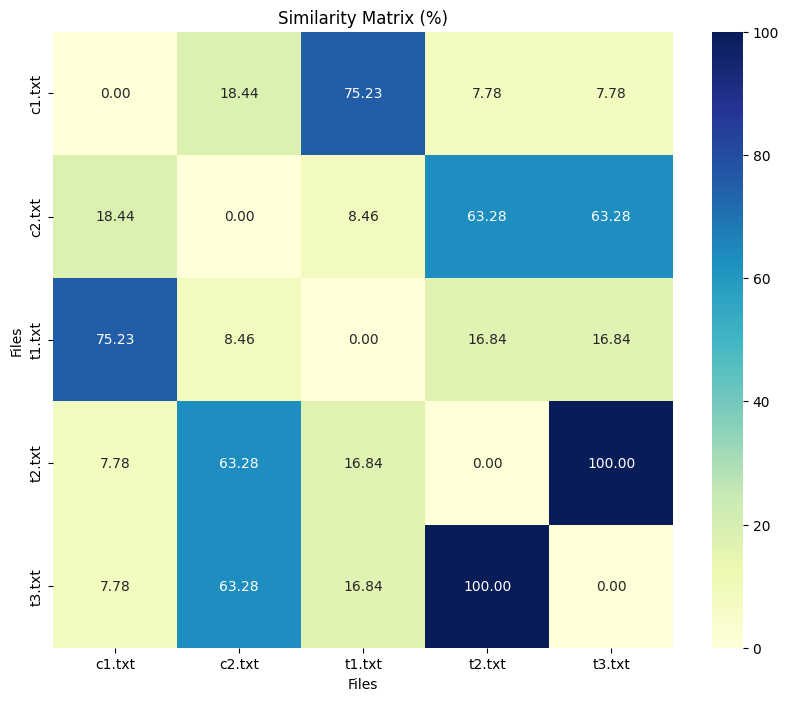

In [14]:
#Plagiarism Checker
#Author-Chethana K

import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class PlagiarismChecker:
    def __init__(self, directory):
        self.directory = directory
        self.txt_files = self.get_txt_files_in_directory()
        
    def get_txt_files_in_directory(self):
        txt_files = [file for file in os.listdir(self.directory) if file.endswith(".txt")]
        return txt_files
    
    def read_and_preprocess_text(self, file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            processed_text = text.lower()  
            return processed_text
    def calculate_similarity(self, text1, text2):
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
        similarity_matrix = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
        return similarity_matrix[0][0] * 100  # Converting to percentage
    
    def check_plagiarism(self):
        num_files = len(self.txt_files)
        similarity_matrix = [[0] * num_files for _ in range(num_files)]
        
        for i in range(num_files):
            for j in range(i + 1, num_files):
                file1_path = os.path.join(self.directory, self.txt_files[i])
                file2_path = os.path.join(self.directory, self.txt_files[j])
                
                text1 = self.read_and_preprocess_text(file1_path)
                text2 = self.read_and_preprocess_text(file2_path)
                
                similarity = self.calculate_similarity(text1, text2)
                similarity_matrix[i][j] = similarity
                similarity_matrix[j][i] = similarity  # Since similarity is bidirectional
                print(f"Similarity between {self.txt_files[i]} and {self.txt_files[j]}: {similarity:.2f}%")
        
        # Creating a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="YlGnBu", 
                    xticklabels=self.txt_files, yticklabels=self.txt_files)
        plt.title("Similarity Matrix (%)")
        plt.xlabel("Files")
        plt.ylabel("Files")
        plt.show()
    
   

# Usage
txt_directory = "./files"
plagiarism_checker = PlagiarismChecker(txt_directory)
plagiarism_checker.check_plagiarism()
